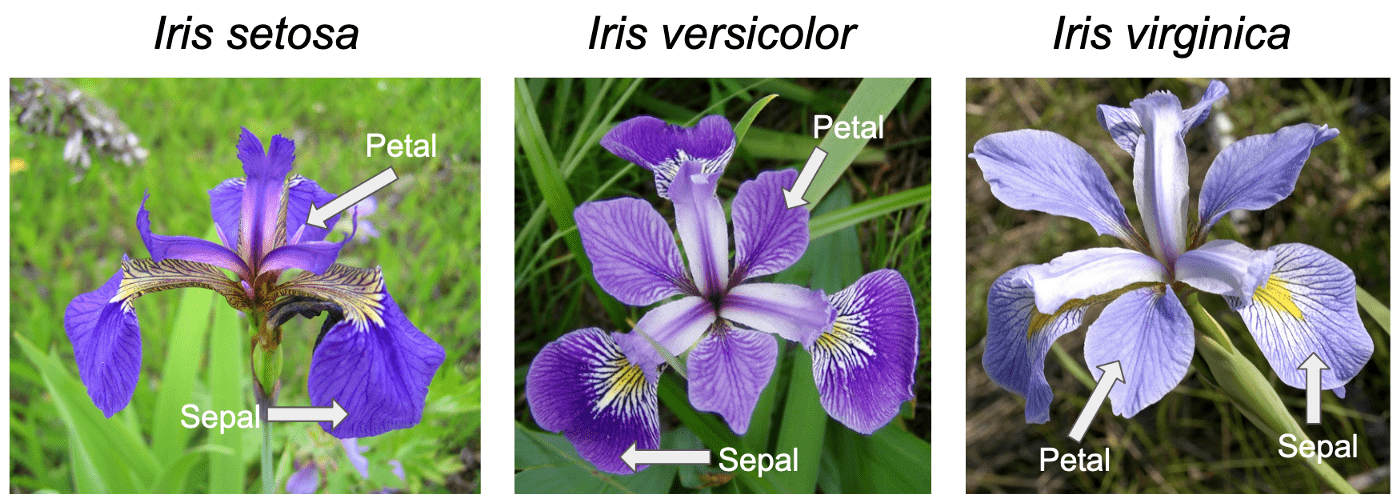

# **Iris Flower Classification**

**👨‍💻Author: Muhammad Hassaan**

[![GitHub](https://img.shields.io/badge/GitHub-Profile-blue?style=for-the-badge&logo=github)](https://github.com/iammuhammadhassaaan) 
[![Kaggle](https://img.shields.io/badge/Kaggle-Profile-blue?style=for-the-badge&logo=kaggle)](https://www.kaggle.com/mhassaan1122) 
[![LinkedIn](https://img.shields.io/badge/LinkedIn-Profile-blue?style=for-the-badge&logo=linkedin)](https://www.linkedin.com/in/iammuhammadhassaan7/)  
[![Email](https://img.shields.io/badge/Email-Contact%20Me-red?style=for-the-badge&logo=email)](mailto:muhammadhassaan7896@gmail.com)


## **About Dataset**
The `Iris dataset` was used in R.A. Fisher's classic 1936 paper, The Use of Multiple Measurements in Taxonomic Problems, and can also be found on the UCI Machine Learning Repository.

It includes three iris species with 50 samples each as well as some properties about each flower. One flower species is linearly separable from the other two, but the other two are not linearly separable from each other.

**Number of Instances**: 150

**Number of Features**: 5
- **Sepal Length** (in cm, numeric)
- **Sepal Width** (in cm, numeric)
- **Petal Length** (in cm, numeric)
- **Petal Width** (in cm, numeric)
- **Species** (categorical: Setosa, Versicolor, Virginica)

**Target Variable**: 
- **Species** (3 classes: Setosa, Versicolor, Virginica)

**Feature Types**:
- 4 Continuous Numeric Features
- 1 Categorical Feature (Target)

**Missing Values**: None

**Class Distribution**:
- **Setosa**: 50 instances
- **Versicolor**: 50 instances
- **Virginica**: 50 instances

**Context**: This dataset is widely used for classification tasks and exploratory data analysis (EDA) in machine learning, especially in demonstrating simple models like k-nearest neighbors (KNN), decision trees, and linear discriminants.

**Primary Use Cases**: 
- Multiclass classification
- Pattern recognition
- Statistical analysis for educational purposes

**License**: Public domain

## Import Libraries

In [42]:
# import libraies
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
import plotly.express as px
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import OneHotEncoder, StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, recall_score, f1_score, confusion_matrix, roc_curve, auc, classification_report

# import warnings
import warnings
warnings.filterwarnings('ignore')

## Import and Load the Data

In [43]:
# import the data
df = sns.load_dataset("iris")

# show the data
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [44]:
# show the tail of the data
df.tail()

,sepal_length,sepal_width,petal_length,petal_width,species
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica
149,5.9,3.0,5.1,1.8,virginica


## Exploratory Data Analysis

### 1. Data Overview

In [45]:
# show the shape of the data
df.shape

(150, 5)

In [46]:
# show the info of the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [47]:
# show the summary statistics of the data
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [48]:
# Check if there any missing values in the dataset
df.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

So, Dataset is fine. No missing values found.

### 2. Data Distribution

array([[<Axes: title={'center': 'sepal_length'}>,
        <Axes: title={'center': 'sepal_width'}>],
       [<Axes: title={'center': 'petal_length'}>,
        <Axes: title={'center': 'petal_width'}>]], dtype=object)

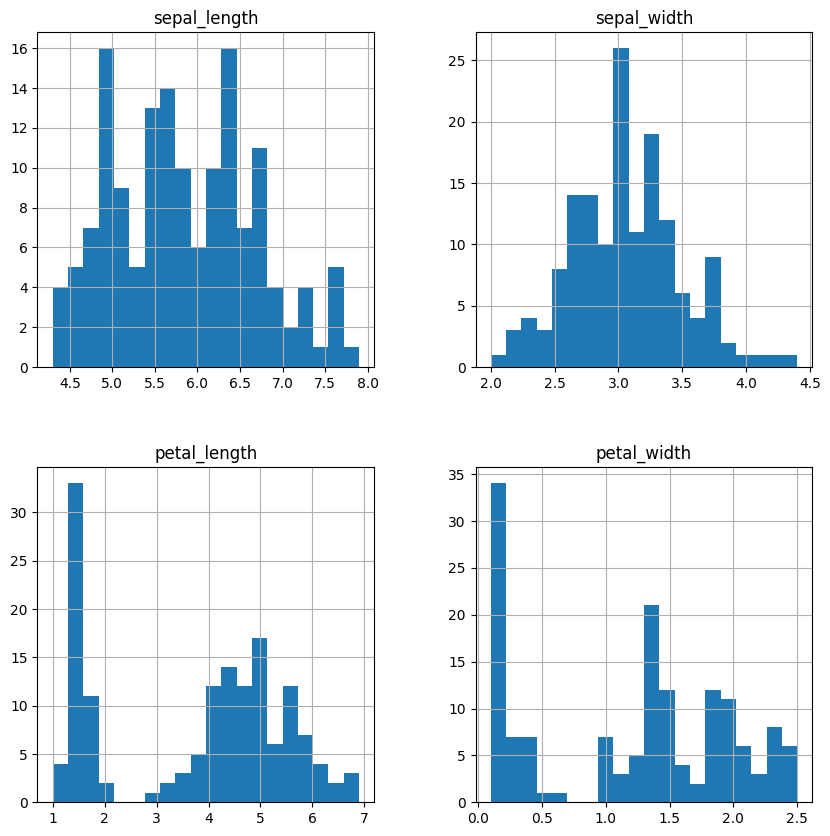

In [49]:
# univariate analysis (histograms)
df.hist(figsize=(10,10), bins=20)

array([[<Axes: ylabel='Density'>, <Axes: ylabel='Density'>],
       [<Axes: ylabel='Density'>, <Axes: ylabel='Density'>]], dtype=object)

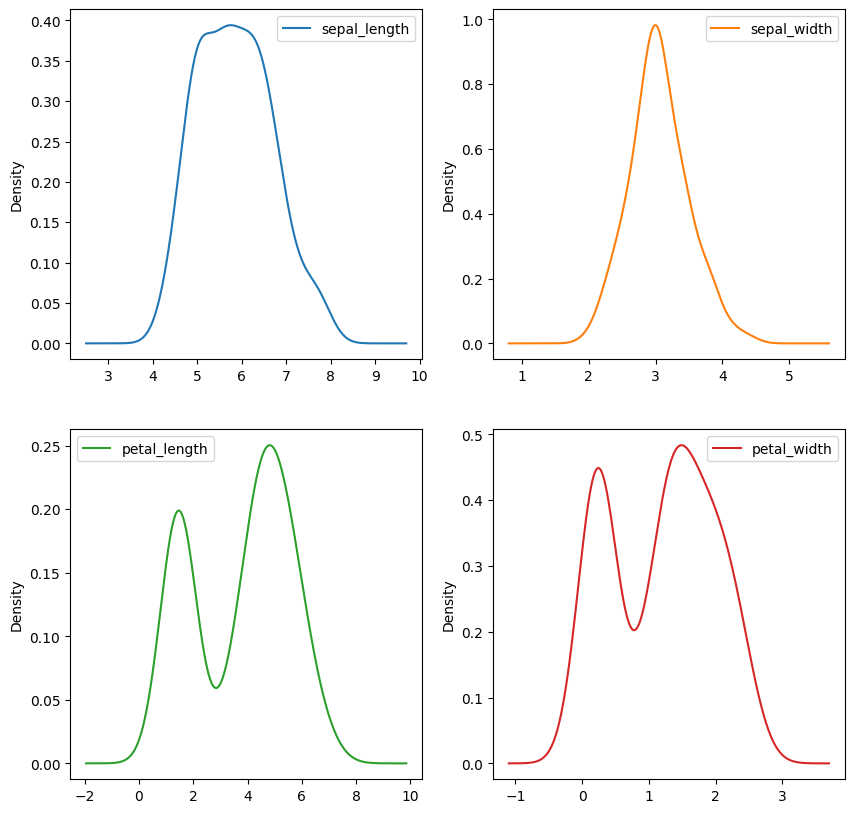

In [50]:
# kernel density estimation (KDE) through pandas
df.plot(kind="kde", subplots=True, layout=(2, 2), figsize=(10, 10), sharex=False, sharey=False)

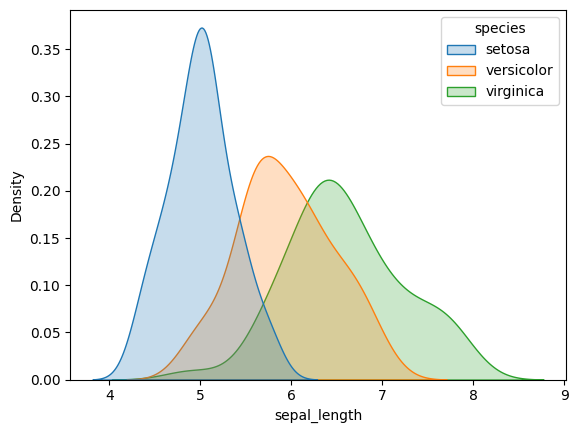

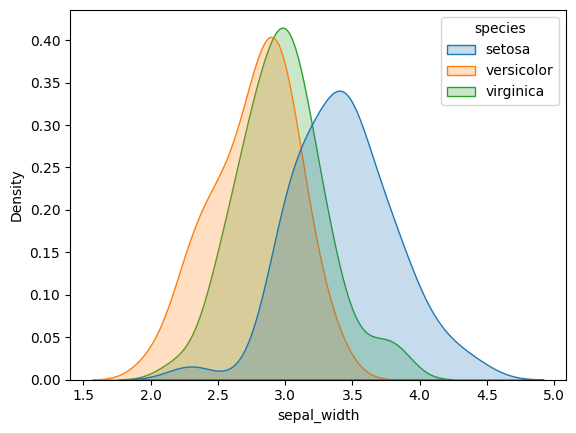

In [51]:
# kernel density estimation (KDE) through seaborn 
sns.kdeplot(data=df, x="sepal_length", hue="species", fill=True)
plt.show()
sns.kdeplot(data=df, x="sepal_width", hue="species", fill=True)
plt.show()

### 3. Relationship Between Features

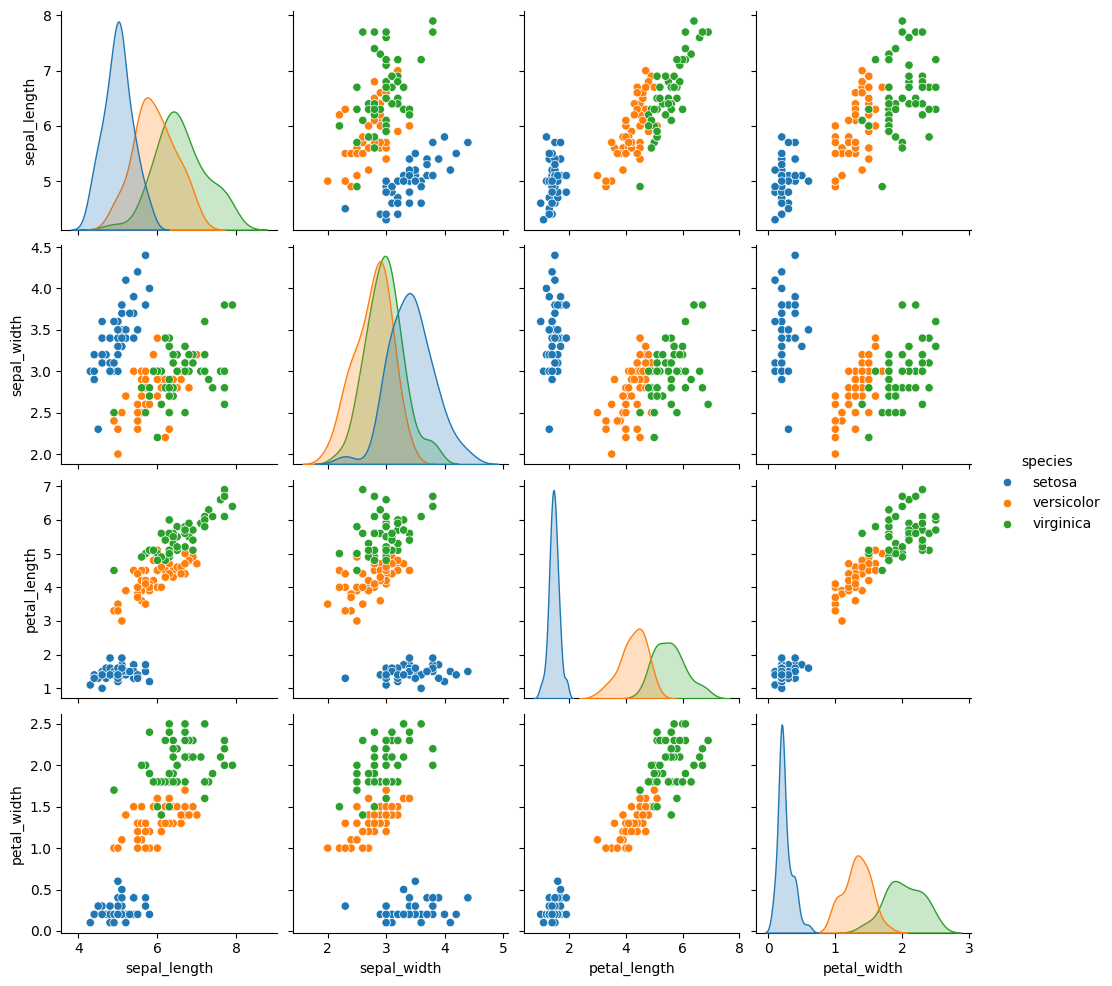

In [52]:
# pairwise plot of all features
sns.pairplot(df, hue="species")

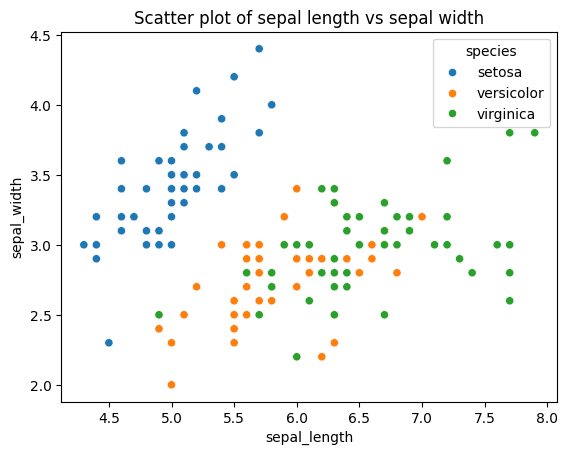

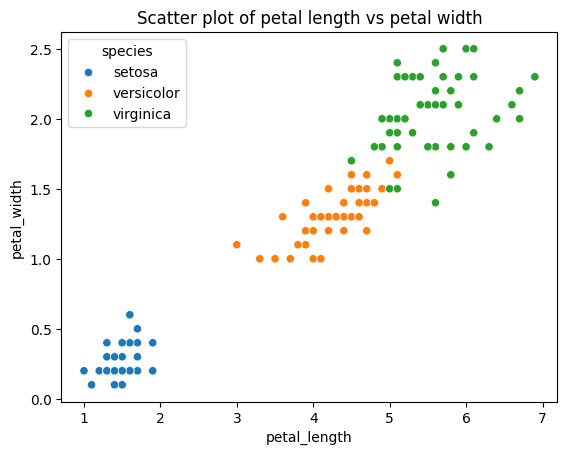

In [53]:
# Scatter plot
sns.scatterplot(data=df, x="sepal_length", y="sepal_width", hue="species")
plt.title("Scatter plot of sepal length vs sepal width")
plt.show()

sns.scatterplot(data=df, x="petal_length", y="petal_width", hue="species")
plt.title("Scatter plot of petal length vs petal width")
plt.show()

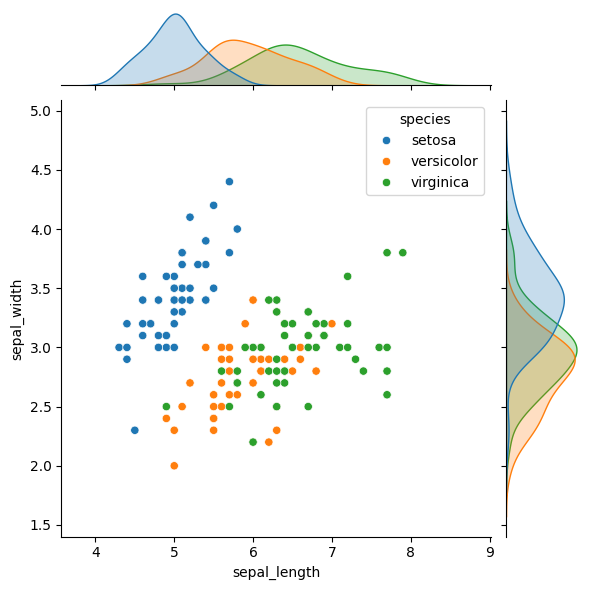

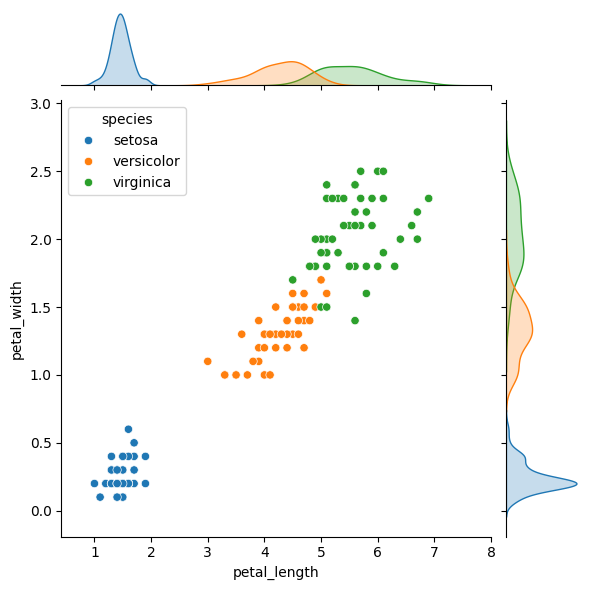

In [54]:
# joinplot
def plot_joint(x, y):
    sns.jointplot(data=df, x=x, y=y, hue="species")

plot_joint("sepal_length", "sepal_width")
plot_joint("petal_length", "petal_width")

### 4. Categorical Variable Analysis

<Axes: xlabel='species', ylabel='count'>

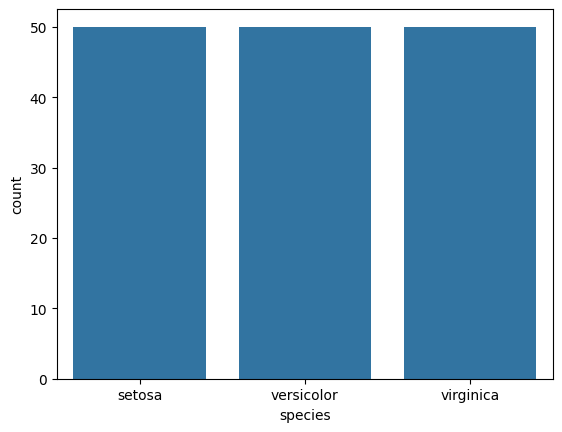

In [55]:
# countplot
sns.countplot(data=df, x="species")

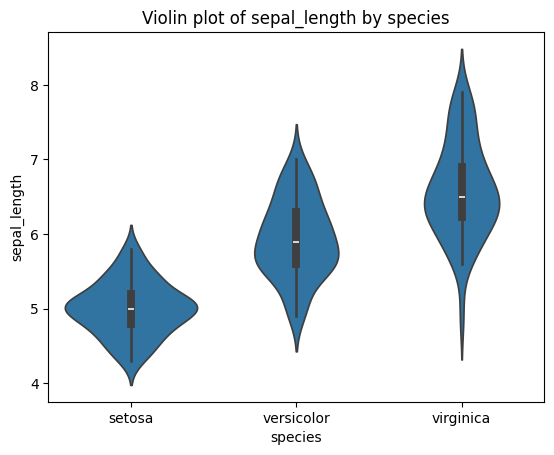

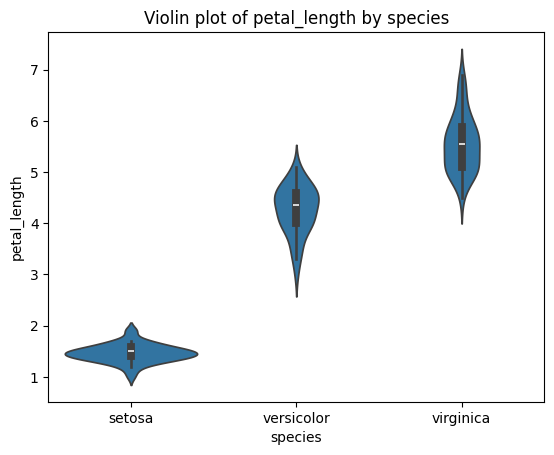

In [56]:
# violon plot
def plot_violin(y):
    sns.violinplot(data=df, x="species", y=y)
    plt.title(f"Violin plot of {y} by species")
    plt.show()

plot_violin("sepal_length")
plot_violin("petal_length")

### 5. Pairwise feature interactions by class

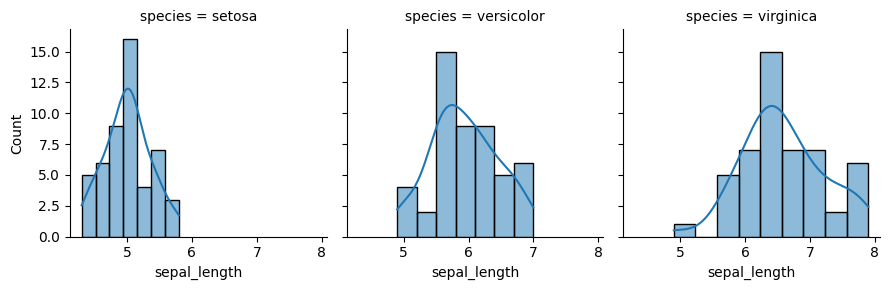

In [57]:
# facetgrid
g = sns.FacetGrid(df, col='species')
g.map(sns.histplot, 'sepal_length', kde=True)

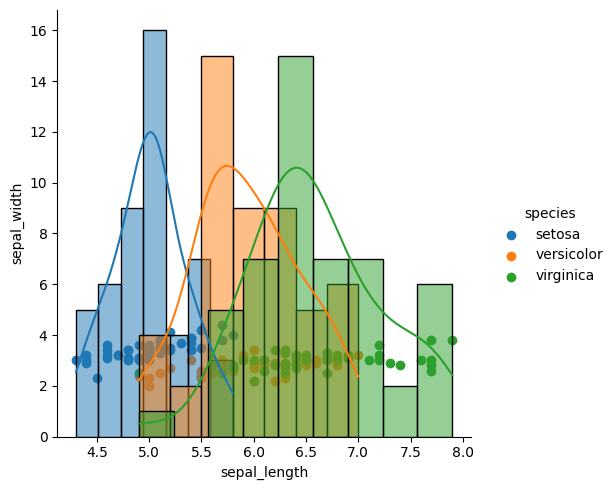

In [58]:
# facetgrid 
g = sns.FacetGrid(df, hue="species", height=5).map(plt.scatter, "sepal_length", "sepal_width").add_legend()
g.map(sns.histplot, 'sepal_length', kde=True)

### 6. Encoding of Categorical Features

In [59]:
# check the unique values in the target variable
df["species"].unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [60]:
# check the count of each class
df["species"].value_counts()

species
setosa        50
versicolor    50
virginica     50
Name: count, dtype: int64

In [61]:
# initialize the label encoder
le = LabelEncoder()
df["species"] = le.fit_transform(df["species"])

In [62]:
# convert the encoded values to float
df["species"] = df["species"].astype(float)

### 7. Correlation Between Features

<Axes: >

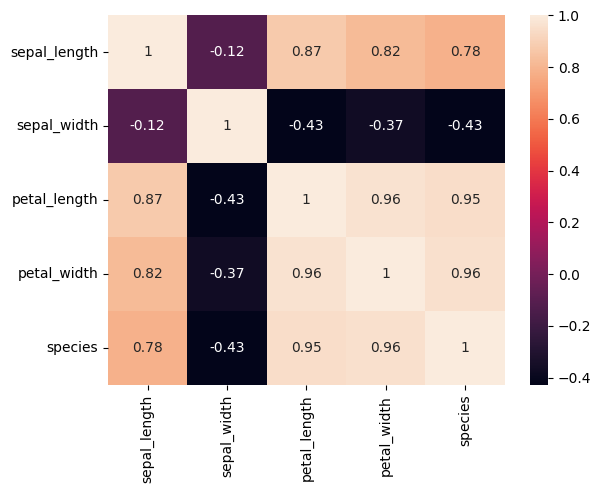

In [63]:
# correlation matrix
corr = df.corr()
sns.heatmap(corr, annot=True)

### 8. Detailed Plotting

<Axes: xlabel='species', ylabel='sepal_length'>

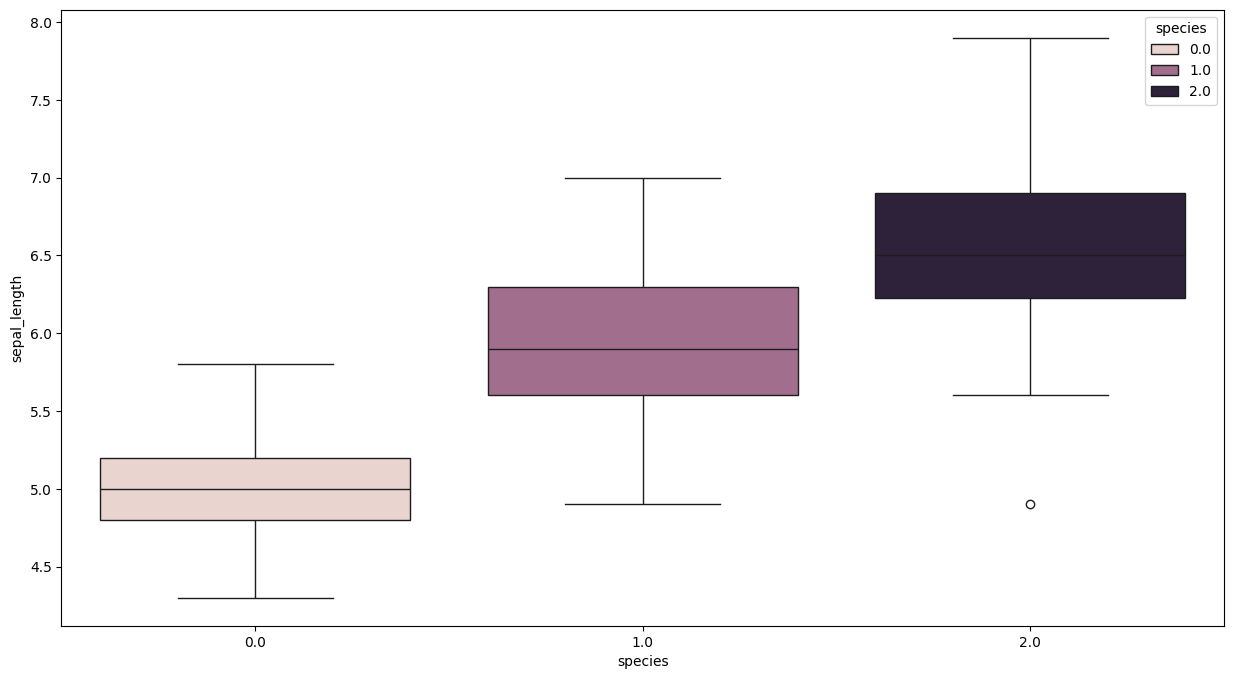

In [64]:
# relationship between species and sepal length
plt.figure(figsize=(15,8))
sns.boxplot(x='species', y='sepal_length', data=df.sort_values('sepal_length', ascending=False), hue='species')

<Axes: xlabel='sepal_width', ylabel='sepal_length'>

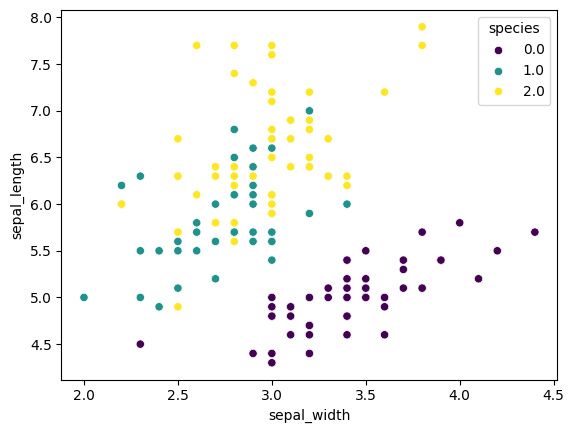

In [65]:
# Relationship between species and sepal width
sns.scatterplot(df, x='sepal_width', y='sepal_length', hue='species', palette='viridis')

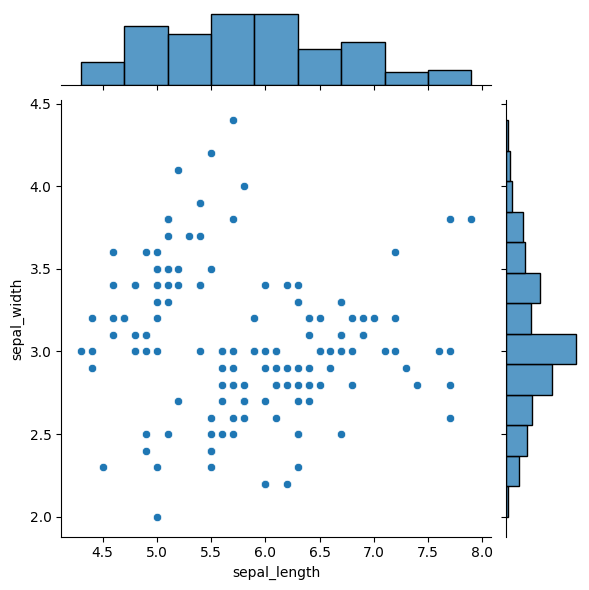

In [66]:
# Relationship between sepal_width and sepal_length
sns.jointplot(df, x='sepal_length', y='sepal_width')

array([[<Axes: title={'center': 'petal_length'}, xlabel='[species]'>,
        <Axes: title={'center': 'petal_width'}, xlabel='[species]'>],
       [<Axes: title={'center': 'sepal_length'}, xlabel='[species]'>,
        <Axes: title={'center': 'sepal_width'}, xlabel='[species]'>]],
      dtype=object)

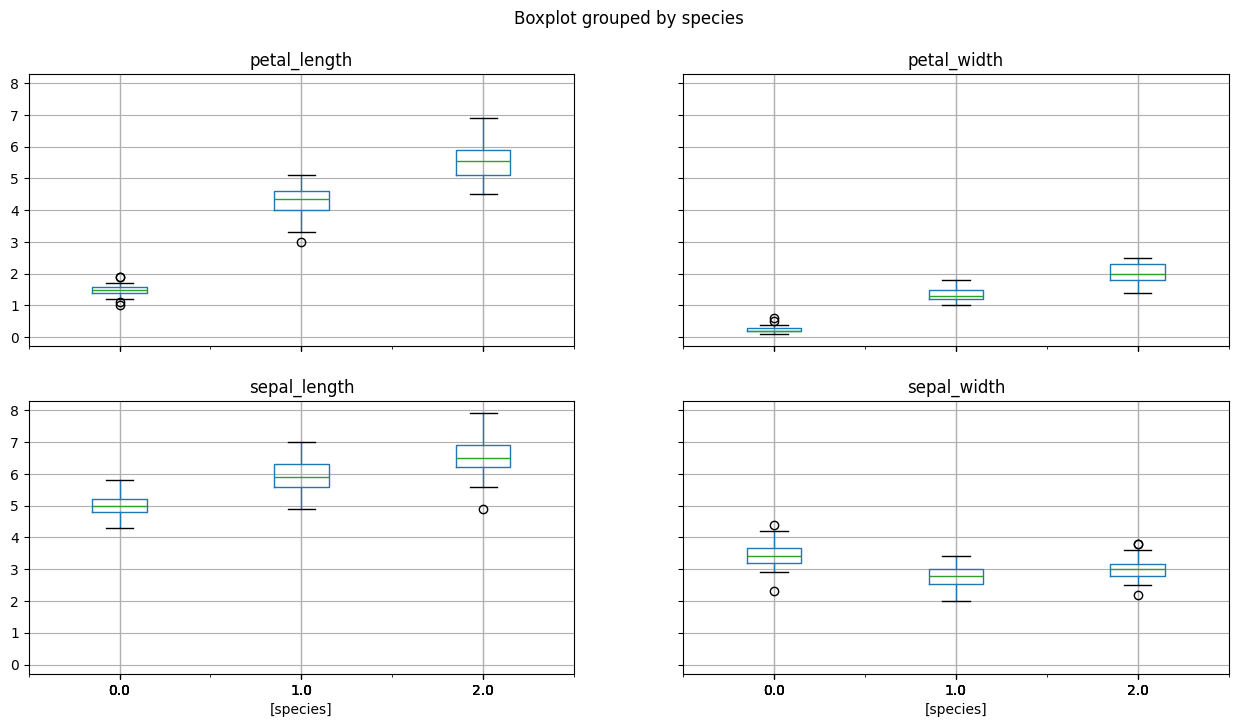

In [67]:
# boxplot
df.boxplot(by='species', figsize=(15, 8))

<Axes: >

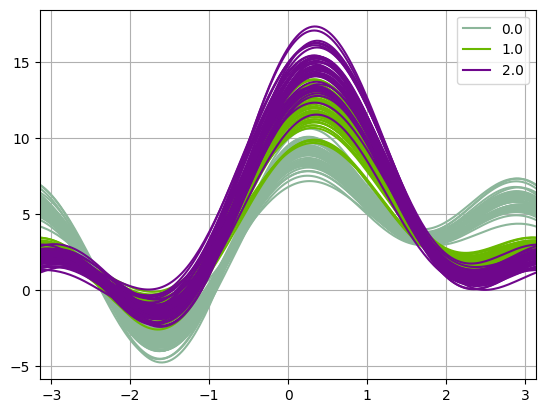

In [68]:
# Andrews_curves
import pandas.plotting
from pandas.plotting import andrews_curves
andrews_curves(df, 'species')

<Figure size 1500x1500 with 0 Axes>

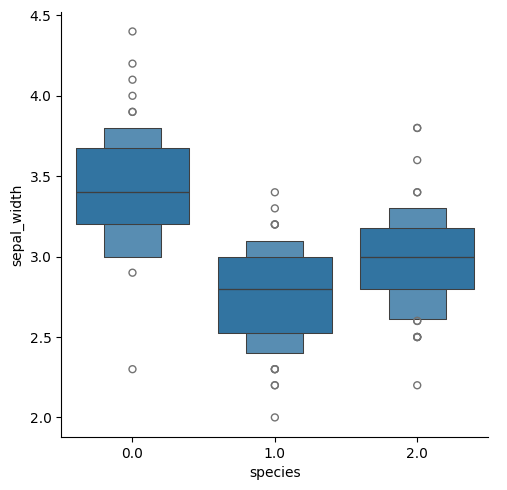

In [69]:
# categorical plot
plt.figure(figsize=(15,15))
sns.catplot(x='species',y='sepal_width',data=df.sort_values('sepal_width',ascending=False),kind='boxen')

<Axes: xlabel='species', ylabel='sepal_width'>

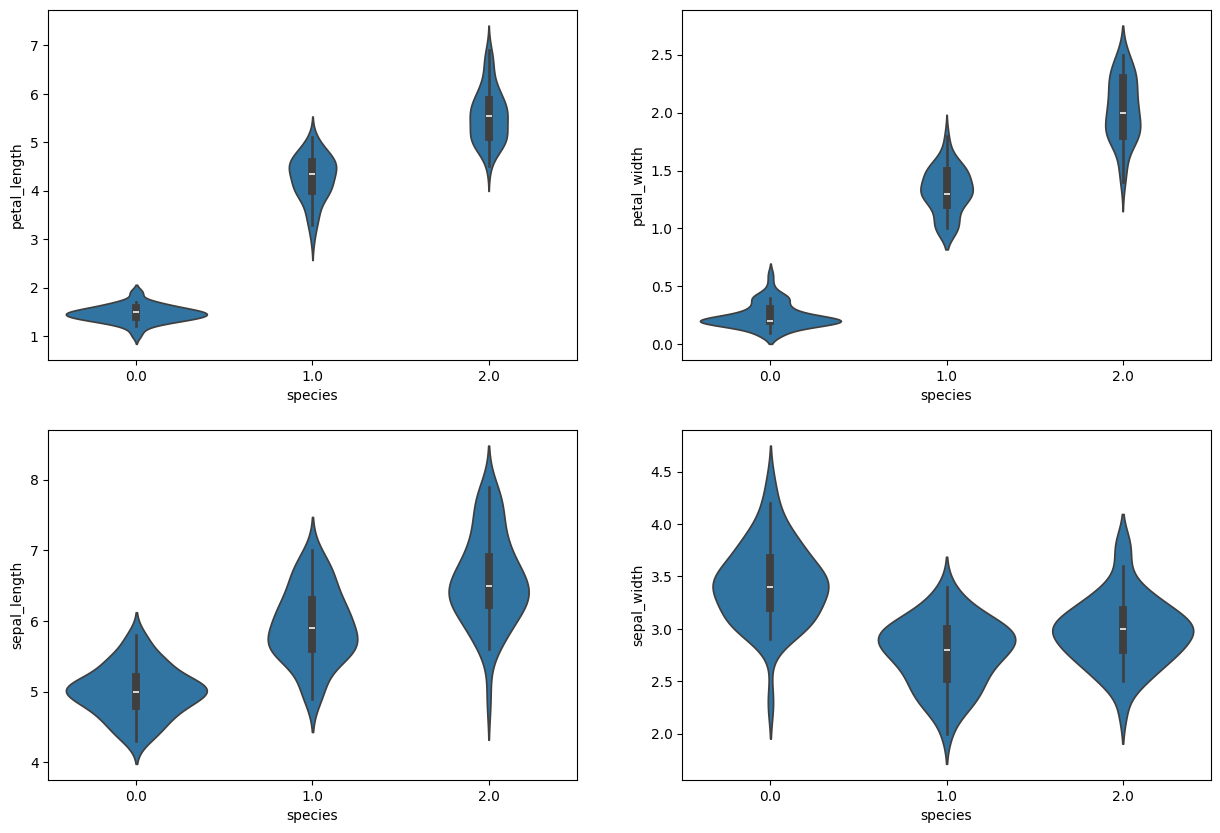

In [70]:
# violinplot
plt.figure(figsize=(15,10))
plt.subplot(2,2,1)
sns.violinplot(x='species',y='petal_length',data=df)
plt.subplot(2,2,2)
sns.violinplot(x='species',y='petal_width',data=df)
plt.subplot(2,2,3)
sns.violinplot(x='species',y='sepal_length',data=df)
plt.subplot(2,2,4)
sns.violinplot(x='species',y='sepal_width',data=df)

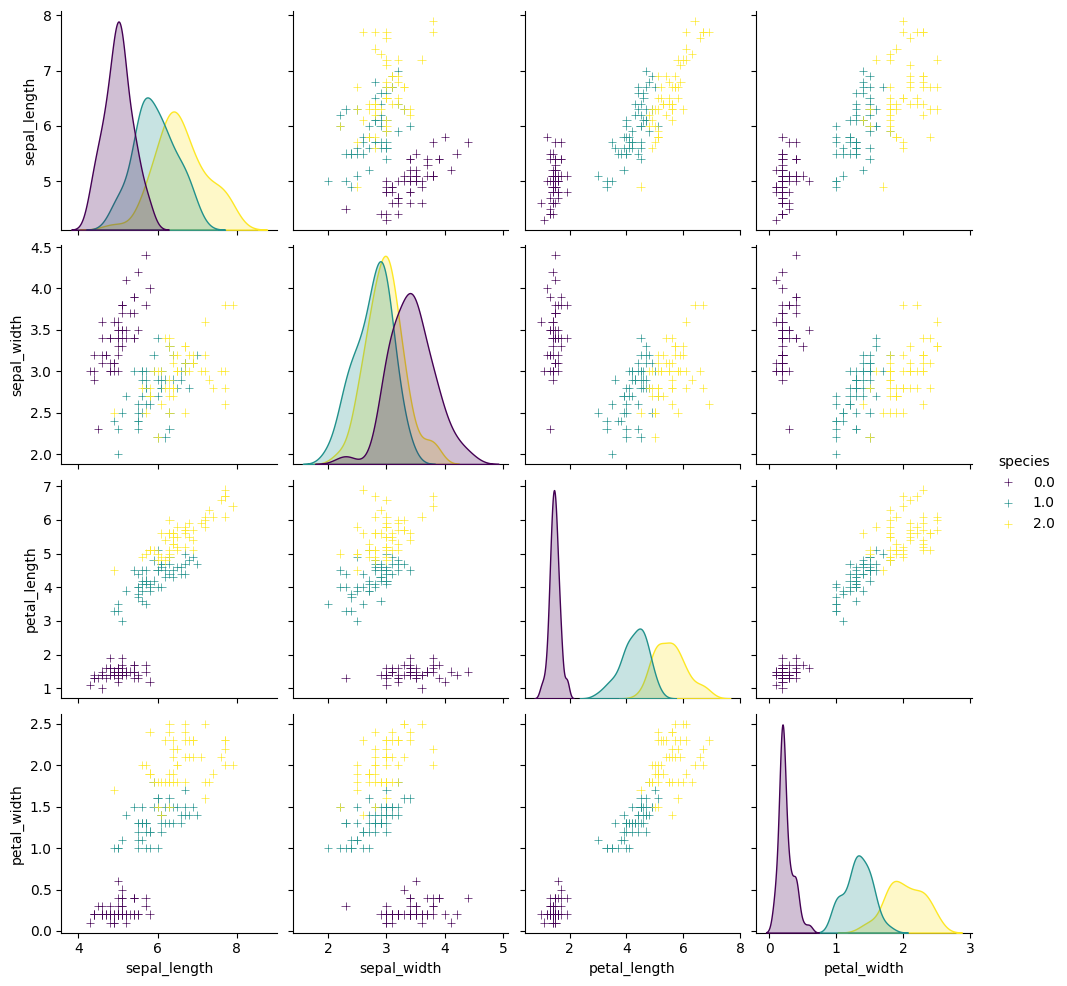

In [71]:
# pairplot
g = sns.pairplot(df, hue='species', markers='+', palette='viridis')
plt.show()

### Insights from EDA on the Iris Dataset

- Petal length and petal width are strong indicators for distinguishing species.
  - Setosa is easily separable with smaller petal measurements.
  - Versicolor and Virginica overlap but can be distinguished by petal measurements.
- Sepal length and sepal width show overlap and are less effective at distinguishing species.
- Petal length and width have non-overlapping regions for the species.
- Sepal width has a wide spread, making it less useful in classification.
- Boxplots show Setosa has a tighter distribution for sepal and petal length, while Versicolor and Virginica show variability.
- Petal length and width are highly positively correlated.
- Sepal width negatively correlates with petal measurements, limiting its usefulness.
- The dataset is balanced across the three species, with no class imbalance.
- Petal length and petal width show clear clusters for each species, making them useful for classification.
- Setosa has the smallest sepal length, Virginica the largest, with Versicolor and Virginica showing overlap.
- Setosa often has a higher sepal width, with significant overlap between Versicolor and Virginica.
- Sepal width and length show little correlation and overlap between species.
- Petal length and width show clear species separation, while sepal width has variability.
- Outliers are visible, especially in Virginica's sepal width, needing attention in preprocessing.
- Andrews curves show Setosa as distinct, while Versicolor and Virginica overlap.
- Categorical plots confirm Setosa's clear separation by petal length and width.
- Violin plots show tightly grouped features for Setosa, while Versicolor and Virginica have wider distributions.
- Petal measurements are key for classification, while sepal features show overlap between species.
- Outliers, particularly in Virginica's sepal width, may impact model training.
- Setosa is distinct, while Versicolor and Virginica show some overlap, especially in sepal features.

## Data Preprocessing

### Feature Scaling

In [72]:
from sklearn.preprocessing import StandardScaler

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit and transform the feature columns (excluding the target 'species')
X_scaled = scaler.fit_transform(df.drop('species', axis=1))

# Update the dataframe
df_scaled = pd.DataFrame(X_scaled, columns=['sepal_length', 'sepal_width', 'petal_length', 'petal_width'])

# Add the species column back to the scaled dataframe
df_scaled['species'] = df['species']


In [73]:
df_scaled.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,-0.900681,1.019004,-1.340227,-1.315444,0.0
1,-1.143017,-0.131979,-1.340227,-1.315444,0.0
2,-1.385353,0.328414,-1.397064,-1.315444,0.0
3,-1.506521,0.098217,-1.283389,-1.315444,0.0
4,-1.021849,1.249201,-1.340227,-1.315444,0.0


## Data Splitting

In [74]:
# define features (X) and target (y)
X = df_scaled.drop("species", axis=1)
y = df_scaled["species"]

# train test split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# check the sizes of the split
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (120, 4)
X_test shape: (30, 4)
y_train shape: (120,)
y_test shape: (30,)


## Model Selection

### 1. Logistic Regression

In [75]:
from sklearn.linear_model import LogisticRegression

# initialize the model
log_reg = LogisticRegression()

# fit the model
log_reg.fit(X_train, y_train)

LogisticRegression()

In [76]:
# make predictions
y_pred = log_reg.predict(X_test)

# evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 1.0
Confusion Matrix:
 [[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]
Classification Report:
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        10
         1.0       1.00      1.00      1.00         9
         2.0       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



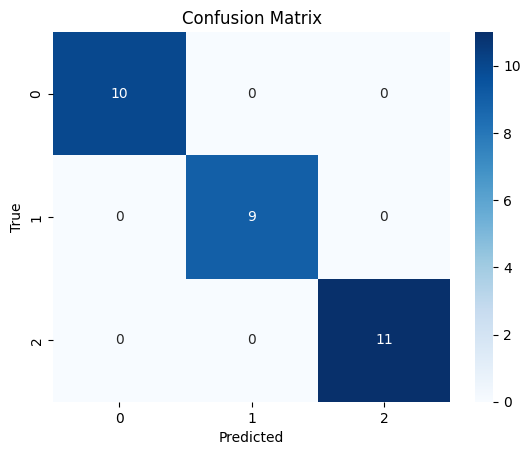

In [77]:
# plot the confusion matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show()

### 2. Decision Tree Classifier

In [78]:
from sklearn.tree import DecisionTreeClassifier

# initialize the model
dtc = DecisionTreeClassifier()

# fit the model
dtc.fit(X_train, y_train)

DecisionTreeClassifier()

In [79]:
# predict the model
y_pred = dtc.predict(X_test)

# evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 1.0
Confusion Matrix:
 [[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]
Classification Report:
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        10
         1.0       1.00      1.00      1.00         9
         2.0       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



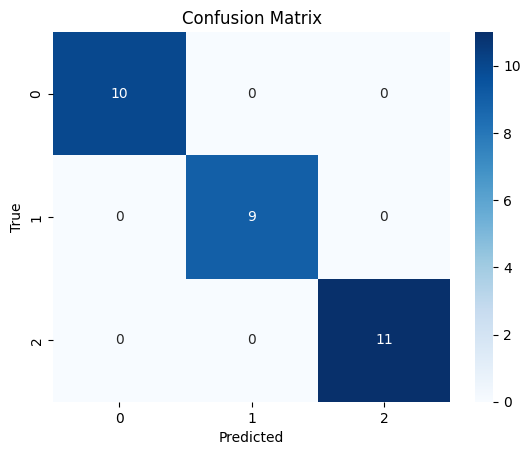

In [80]:
# plot confusion matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show()

### 3. Support Vector Machine (SVM)

In [81]:
from sklearn.svm import SVC

# initialize the model
svm = SVC()

# fit the model
svm.fit(X_train, y_train)

SVC()

In [82]:
# make predictions
y_pred = svm.predict(X_test)

# evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 1.0
Confusion Matrix:
 [[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]
Classification Report:
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        10
         1.0       1.00      1.00      1.00         9
         2.0       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



### 4. k-Nearest Neighbors (k-NN)

In [83]:
from sklearn.neighbors import KNeighborsClassifier

# Initialize the model with k=3
knn = KNeighborsClassifier(n_neighbors=3)

# Fit the model
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [85]:
# Make predictions
y_pred_knn = knn.predict(X_test)

# Evaluation
print("k-NN Accuracy:", accuracy_score(y_test, y_pred_knn))
print("k-NN Confusion Matrix:\n", confusion_matrix(y_test, y_pred_knn))
print("k-NN Classification Report:\n", classification_report(y_test, y_pred_knn))

k-NN Accuracy: 1.0
k-NN Confusion Matrix:
 [[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]
k-NN Classification Report:
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        10
         1.0       1.00      1.00      1.00         9
         2.0       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



## Model Compasrion

In [86]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Initialize all models again for convenience (already done, but just summarizing)
logreg = LogisticRegression()
dtree = DecisionTreeClassifier(random_state=42)
svm_model = SVC()
knn = KNeighborsClassifier(n_neighbors=3)

# Fit all models
models = {
    "Logistic Regression": logreg,
    "Decision Tree": dtree,
    "SVM": svm_model,
    "k-NN": knn
}

# Train each model and evaluate
for model_name, model in models.items():
    # Fit the model
    model.fit(X_train, y_train)
    
    # Predict on the test set
    y_pred = model.predict(X_test)
    
    # Evaluate
    print(f"\n--- {model_name} ---")
    print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
    print(f"Classification Report:\n{classification_report(y_test, y_pred)}")
    print(f"Confusion Matrix:\n{confusion_matrix(y_test, y_pred)}")



--- Logistic Regression ---
Accuracy: 1.0000
Classification Report:
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        10
         1.0       1.00      1.00      1.00         9
         2.0       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

Confusion Matrix:
[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]

--- Decision Tree ---
Accuracy: 1.0000
Classification Report:
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        10
         1.0       1.00      1.00      1.00         9
         2.0       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

Confusion Matrix:
[[10  0  0]
 [ 0  9  0]
 [ 0  0 1

---

## Conclusion and Insights

- **Simple Dataset**: The Iris dataset is small and well-structured, with clear separations between species based on features.

- **Distinct Features**: Petal length and petal width are strong indicators that effectively differentiate the species.

- **Balanced Classes**: The dataset contains an equal number of samples for each species, preventing class imbalance issues.

- **Low Complexity**: The relationships among features are relatively simple, making it easier for models to capture patterns.

- **Effective Algorithms**: All tested algorithms (Logistic Regression, Decision Tree, SVM, k-NN) are capable of perfectly fitting the training data.

- **No Noise**: The dataset appears to have minimal noise or outliers, contributing to clearer decision boundaries for classification.

- **Training Size**: The small size of the dataset allows for memorization by the models, leading to perfect accuracy on the training data.


---

## **👨‍💻Author: Muhammad Hassaan**

[![GitHub](https://img.shields.io/badge/GitHub-Profile-blue?style=for-the-badge&logo=github)](https://github.com/iammuhammadhassaaan) 
[![Kaggle](https://img.shields.io/badge/Kaggle-Profile-blue?style=for-the-badge&logo=kaggle)](https://www.kaggle.com/mhassaan1122) 
[![LinkedIn](https://img.shields.io/badge/LinkedIn-Profile-blue?style=for-the-badge&logo=linkedin)](https://www.linkedin.com/in/iammuhammadhassaan7/)  
[![Email](https://img.shields.io/badge/Email-Contact%20Me-red?style=for-the-badge&logo=email)](mailto:muhammadhassaan7896@gmail.com)


---